#TP2 ANGELA SILES

In [34]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.stats as st
from PIL import Image

In [35]:

def crear_filtro_gaussiano(h, w, k_size, sigma, img):
    # Creamos un núcleo Gaussiano unidimensional
    kernel = cv2.getGaussianKernel(ksize=k_size, sigma=sigma)
    gaussian_kernel = kernel * kernel.T

    # Generación de relleno (padding)
    w_pad_izquierdo, w_pad_derecho = (((w - k_size) // 2) + 1, (w - k_size) // 2)
    h_pad_superior, h_pad_inferior = (((h - k_size) // 2) + 1, (h - k_size) // 2)

    gauss_kernel = np.pad(gaussian_kernel, pad_width=((h_pad_superior, h_pad_inferior), (w_pad_izquierdo, w_pad_derecho)))
    forma_gauss_kernel = gauss_kernel.shape

    # Transformada de Fourier para el núcleo
    kernel_fft = np.fft.fft2(gauss_kernel)

    # Transformada de Fourier para la imagen
    img_fft = np.fft.fft2(img)

    return gauss_kernel, kernel_fft


In [36]:
img = cv2.imread('adaw.jpg', cv2.IMREAD_GRAYSCALE)

In [37]:
h = img.shape[0]
w = img.shape[1]
print(h)
print(w)

720
480


In [38]:
kernel, kernel_tf = create_gauss_filter(h, w,5, 1.4,img)

-1

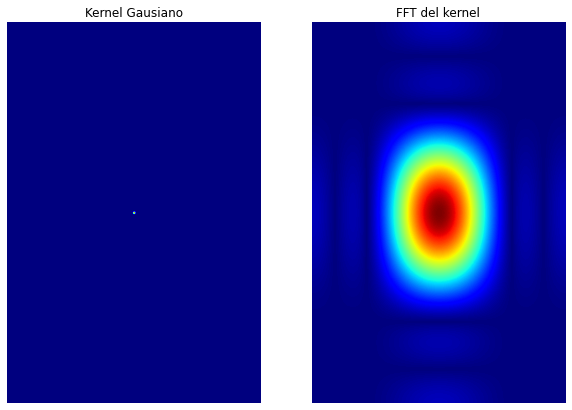

In [39]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
cv2.waitKey(0)
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')
cv2.waitKey(0)

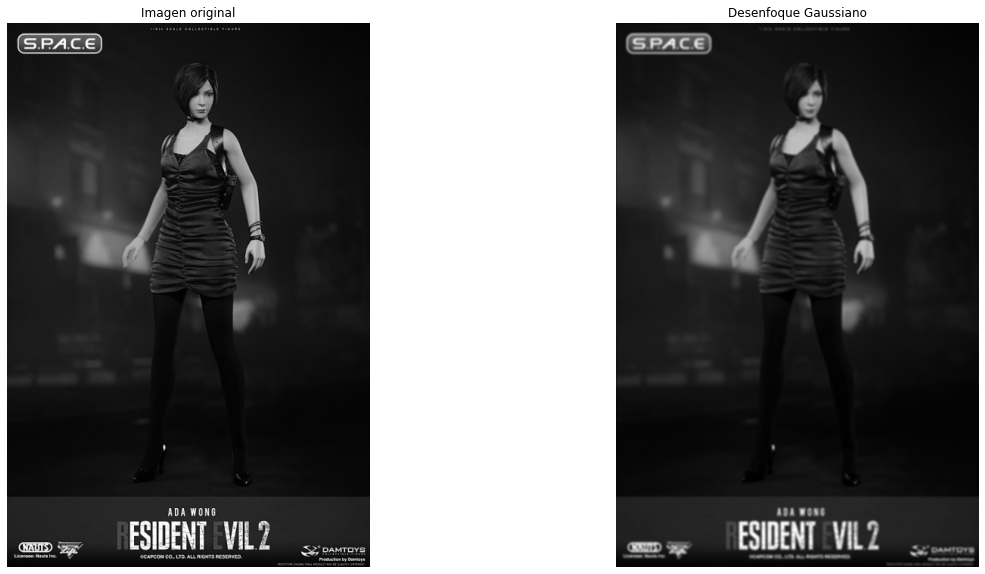

In [40]:
img = cv2.imread('adaw.jpg', cv2.IMREAD_GRAYSCALE)

img_fft = np.fft.fft2(img)

filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

# Mostrar las imágenes original y filtrada
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(img_gauss), cmap='gray')
plt.title('Desenfoque Gaussiano')
plt.axis('off')
# Guardar la imagen de desenfoque gaussiano
output_path = 'imagen_desenfoque_gaussiano.jpg'
cv2.imwrite(output_path, np.abs(img_gauss))
plt.show()

Algoritmo para la medida de calidad de imagen

Entrada: Imagen I de tamaño M×N.

Salida: Medida de Calidad de Imagen (FM) donde FM significa Medida de Desenfoque de 
Imagen en el Dominio de Frecuencia.

Paso 1: Calcular F, que es la representación de la Transformada de Fourier de la imagen I.

Paso 2: Encontrar Fc, que se obtiene desplazando el origen de F al centro.

Paso 3: Calcular AF = abs (Fc), donde AF es el valor absoluto de la transformada de Fourier centrada de la imagen I.

Paso 4: Calcular M = max (AF), donde M es el valor máximo del componente de frecuencia en F.

Paso 5: Calcular TH = el número total de píxeles en F cuyo valor de píxel > umbral, donde umbral = M/1000.

Paso 6: Calcular la Medida de Calidad de Imagen (FM) a partir de la ecuación (1).

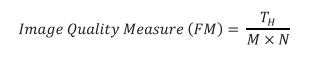

In [41]:

def calculate_image_quality(image):
    height = image.shape[0]  # Alto de la imagen
    width = image.shape[1]   # Ancho de la imagen
    
    # Calcular la Transformada de Fourier para la imagen
    image_fft = np.fft.fft2(image)
    
    # Desplazar la FFT de la imagen al centro
    shifted_image_fft = np.fft.fftshift(image_fft)
    
    # Calcular el valor absoluto de la FFT centrada de la imagen
    abs_shifted_image_fft = np.abs(shifted_image_fft)
    
    # Calcular el valor máximo de la componente de frecuencia en la FFT centrada
    max_frequency_component = np.max(abs_shifted_image_fft)
    
    # Calcular el umbral para el conteo de píxeles
    threshold = max_frequency_component / 1000
    
    # Calcular la cantidad total de píxeles con valor superior al umbral
    pixels_above_threshold = np.sum(np.array(abs_shifted_image_fft) >= threshold)
    
    # Calcular la medida de calidad de imagen FM
    image_quality_measure = pixels_above_threshold / (height + width)
    
    return image_quality_measure


In [42]:
img=cv2.imread("adaw.jpg",cv2.IMREAD_GRAYSCALE)
VALOR=calculate_image_quality(img);
VALOR

39.37

In [43]:
img=cv2.imread("imagen_desenfoque_gaussiano.jpg",cv2.IMREAD_GRAYSCALE)
VALOR=calculate_image_quality(img);
VALOR

14.8275

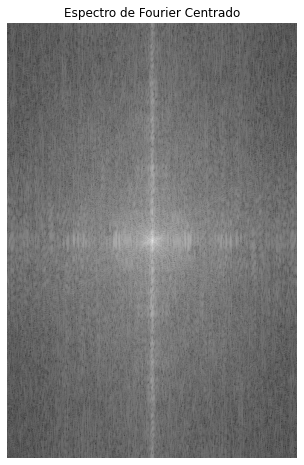

In [44]:


def plot_centered_fft(image):
    # Calcular la transformada de Fourier centrada
    fft_image = np.fft.fftshift(np.fft.fft2(image))
    
    # Mostrar el espectro de Fourier centrado
    plt.figure(figsize=(8, 8))
    plt.imshow(np.log(np.abs(fft_image) + 1), cmap='gray')
    plt.title('Espectro de Fourier Centrado')
    plt.axis('off')
    plt.show()

img = cv2.imread('adaw.jpg', cv2.IMREAD_GRAYSCALE)

# Mostrar el espectro de Fourier centrado de la imagen original
plot_centered_fft(img)


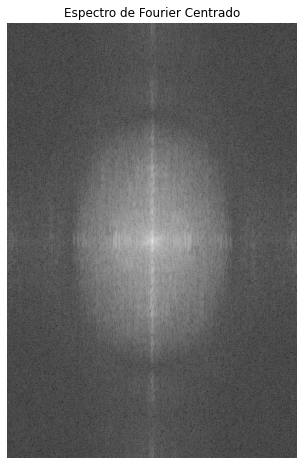

In [45]:


def plot_centered_fft(image):
    # Calcular la transformada de Fourier centrada
    fft_image = np.fft.fftshift(np.fft.fft2(image))
    
    # Mostrar el espectro de Fourier centrado
    plt.figure(figsize=(8, 8))
    plt.imshow(np.log(np.abs(fft_image) + 1), cmap='gray')
    plt.title('Espectro de Fourier Centrado')
    plt.axis('off')
    plt.show()

img = cv2.imread('imagen_desenfoque_gaussiano.jpg', cv2.IMREAD_GRAYSCALE)

# Mostrar el espectro de Fourier centrado de la imagen original
plot_centered_fft(img)

In [46]:
img=cv2.imread("adaw.jpg")

#punto 3

se elijio: 

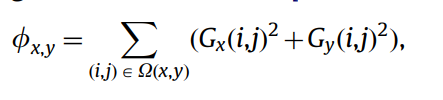

In [47]:

def tenengrad(image):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar el operador de Sobel para obtener los gradientes X e Y
    gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calcular la magnitud del gradiente al cuadrado
    gradient_magnitude_squared = np.square(gradient_x) + np.square(gradient_y)
    
    # Sumar los valores de magnitud del gradiente al cuadrado en la región de interés (ventana)
    phi = np.sum(gradient_magnitude_squared)
    
    # Mostrar las imágenes de los gradientes y la imagen combinada
    cv2.imshow("Sobel X", cv2.convertScaleAbs(gradient_x))
    cv2.imshow("Sobel Y", cv2.convertScaleAbs(gradient_y))
    combined = cv2.addWeighted(gradient_x, 0.5, gradient_y, 0.5, 0)
    cv2.imshow("Sobel Combined", cv2.convertScaleAbs(combined))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return phi


# Calcular la métrica de Tenengrad para la imagen y mostrar las imágenes
tenengrad_value = tenengrad(img)

#print(f"Métrica de Tenengrad: {tenengrad_value:.4f}")


Métrica de Tenengrad: 4003600822.0000
